# **GENERACIÓN DE LA BASE DE DATOS DE SEÑALES ECG**
- Tesista: Moises Meza-Rodriguez
- TEMA: Generación de señales sintéticas de Bloqueo de rama izquierda y derecha de la base de datos **ECG signals (1000 fragments)**

---

## **1.Entendimiento del negocio**



### **Problemática**
Muchos de los proyectos de clasificación que usan datasets sobre señales biomédicas, trabajan los modelos sin analizar la calidad de los datos lo cual sesga el resultado de salida. Parte de la calidad de los datos es verificar que las señales esten balanceadas y que cuenten con caracteristicas relevantes a su etiqueta. Sin embargo, es poco probable encontrar dataset cuyas clases esten balanceadas.

### **Justificación**
Proponemos desarrollar un modelo basados en redes GANs para generar sintéticamente señales de electrocardiograma, a partir de la base de datos de MIT-BIH. Nos centraremos en balancear las clases de bloqueo de rama izquierda(LBBBB) de 103 señales, bloqueo de rama derecha(LBBBB) de 62 señales, respecto a la señal ritmo sinusal normal(NSR) de 283 señales.

### **Sobre la base de datos**
Para fines de investigación, las señales de ECG se obtuvieron del servicio PhysioNet (http://www.physionet.org) de la base de datos de arritmias del MIT-BIH. La base de datos creada con señales de ECG se describe a continuación. 1) Las señales de ECG fueron de 45 pacientes: 19 mujeres (edad: 23-89) y 26 hombres (edad: 32-89). 2) Las señales de ECG contenían 17 clases: ritmo sinusal normal, ritmo de marcapasos y 15 tipos de disfunciones cardíacas (para cada una de las cuales se recogieron al menos 10 fragmentos de señal). 3) Todas las señales de ECG se registraron a una frecuencia de muestreo de 360 ​​[Hz] y una ganancia de 200 [adu / mV]. 4) Para el análisis, se seleccionaron aleatoriamente 1000 fragmentos de 10 segundos (3600 muestras) de la señal de ECG (no superpuestos). 5) Solo se utilizaron señales derivadas de una derivación, la MLII. 6) Los datos están en formato mat (Matlab).

## **2.Entendimiento de la data**

#### **2.1 Generación de la data**

In [1]:
!wget https://data.mendeley.com/public-files/datasets/7dybx7wyfn/files/854dd691-aad3-4793-af3b-6142d1ec8a2a/file_downloaded -O dataset_ecg.zip

--2025-10-13 11:18:31--  https://data.mendeley.com/public-files/datasets/7dybx7wyfn/files/854dd691-aad3-4793-af3b-6142d1ec8a2a/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/503a174a-a723-4aaa-86f2-9483e7412a77 [following]
--2025-10-13 11:18:32--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/503a174a-a723-4aaa-86f2-9483e7412a77
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.66.116, 52.218.116.146, 3.5.71.115, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.66.116|:443... 

In [ ]:
!unzip dataset_ecg.zip -d ./RAW_ECG_DATASET

Archive:  dataset_ecg.zip
   creating: ./dataset_ecg/MLII/
   creating: ./dataset_ecg/MLII/1 NSR/
  inflating: ./dataset_ecg/MLII/1 NSR/100m (0).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (1).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (2).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (3).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (4).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (5).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (6).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (7).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (8).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/100m (9).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/101m (0).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/101m (1).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/101m (10).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/101m (2).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/101m (3).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/101m (4).mat  
  inflating: ./dataset_ecg/MLII/1 NSR/101m (5).mat  


In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from scipy.io import loadmat


In [2]:
path_root = os.getcwd()
path_root

'/home/hinton2/Documents/proyecto_moises/GANS_EKG/TESIS2/Tesis-MIA-UNI/notebooks'

In [ ]:
path_db = "RAW_ECG_DATASET/MLII/"

In [4]:
list_path = sorted(os.listdir(os.path.join(path_root, path_db)))
list_path

['1 NSR',
 '10 VT',
 '11 IVR',
 '12 VFL',
 '13 Fusion',
 '14 LBBBB',
 '15 RBBBB',
 '16 SDHB',
 '17 PR',
 '2 APB',
 '3 AFL',
 '4 AFIB',
 '5 SVTA',
 '6 WPW',
 '7 PVC',
 '8 Bigeminy',
 '9 Trigeminy']

In [5]:
def extract_label(text):
    return re.findall(r'(\d+)\s+(.*)', text)[0][1]

extract_label("16 SDHB")

'SDHB'

In [6]:
def load_ecg_data(file_list):
    data = []
    for file in file_list:
        mat_data = loadmat(file)
        data.append(mat_data['val'][0])
    return np.array(data)

In [7]:
dict_labels = {}
for i in range(len(list_path)):
    #print(i, extract_label(list_path[i]))
    label = extract_label(list_path[i])
    data_aux = os.listdir(os.path.join(path_root, path_db,list_path[i]))
    data_aux = list(map(lambda x: os.path.join(path_root, path_db,list_path[i],x), data_aux))
    #print(data_aux[:3])
    dict_labels[label] = load_ecg_data(data_aux)

dict_labels

{'NSR': array([[ 929,  930,  936, ...,  969,  968,  965],
        [ 991,  992,  990, ..., 1010, 1009, 1005],
        [ 968,  967,  964, ...,  901,  901,  901],
        ...,
        [ 849,  849,  849, ...,  823,  824,  824],
        [ 835,  839,  835, ...,  839,  853,  861],
        [1045, 1043, 1043, ...,  984,  982,  979]],
       shape=(283, 3600), dtype=int16),
 'VT': array([[ 949,  945,  945, ...,  930,  927,  931],
        [ 865,  868,  873, ..., 1093, 1097, 1101],
        [ 930,  929,  928, ...,  937,  941,  948],
        ...,
        [ 962,  961,  960, ...,  911,  914,  913],
        [ 880,  882,  884, ..., 1266, 1265, 1254],
        [ 957,  963,  969, ...,  925,  925,  925]],
       shape=(10, 3600), dtype=int16),
 'IVR': array([[1005, 1004, 1003, ...,  973,  972,  972],
        [1033, 1035, 1034, ...,  990,  990,  993],
        [ 999, 1000, 1001, ..., 1042, 1048, 1051],
        ...,
        [ 990,  991,  988, ..., 1009, 1012, 1009],
        [1142, 1144, 1131, ...,  977,  977, 

Lista de las rutas de NSR, LBBBB y RBBBB

In [58]:
print(dict_labels.keys())
print("n clases:",len(dict_labels))

dict_keys(['NSR', 'VT', 'IVR', 'VFL', 'Fusion', 'LBBBB', 'RBBBB', 'SDHB', 'PR', 'APB', 'AFL', 'AFIB', 'SVTA', 'WPW', 'PVC', 'Bigeminy', 'Trigeminy'])
n clases: 17


Generamos la base de datos de las señales acorde a sus etiquetas o labels

In [130]:
import pickle

with open('dict_labels.pkl', 'wb') as f:
    pickle.dump(dict_labels, f)


#### **2.2 Graficamos una señal de ejemplo por cada clase**

Graficamos en el dominio del tiempo

Señales de DATABASE



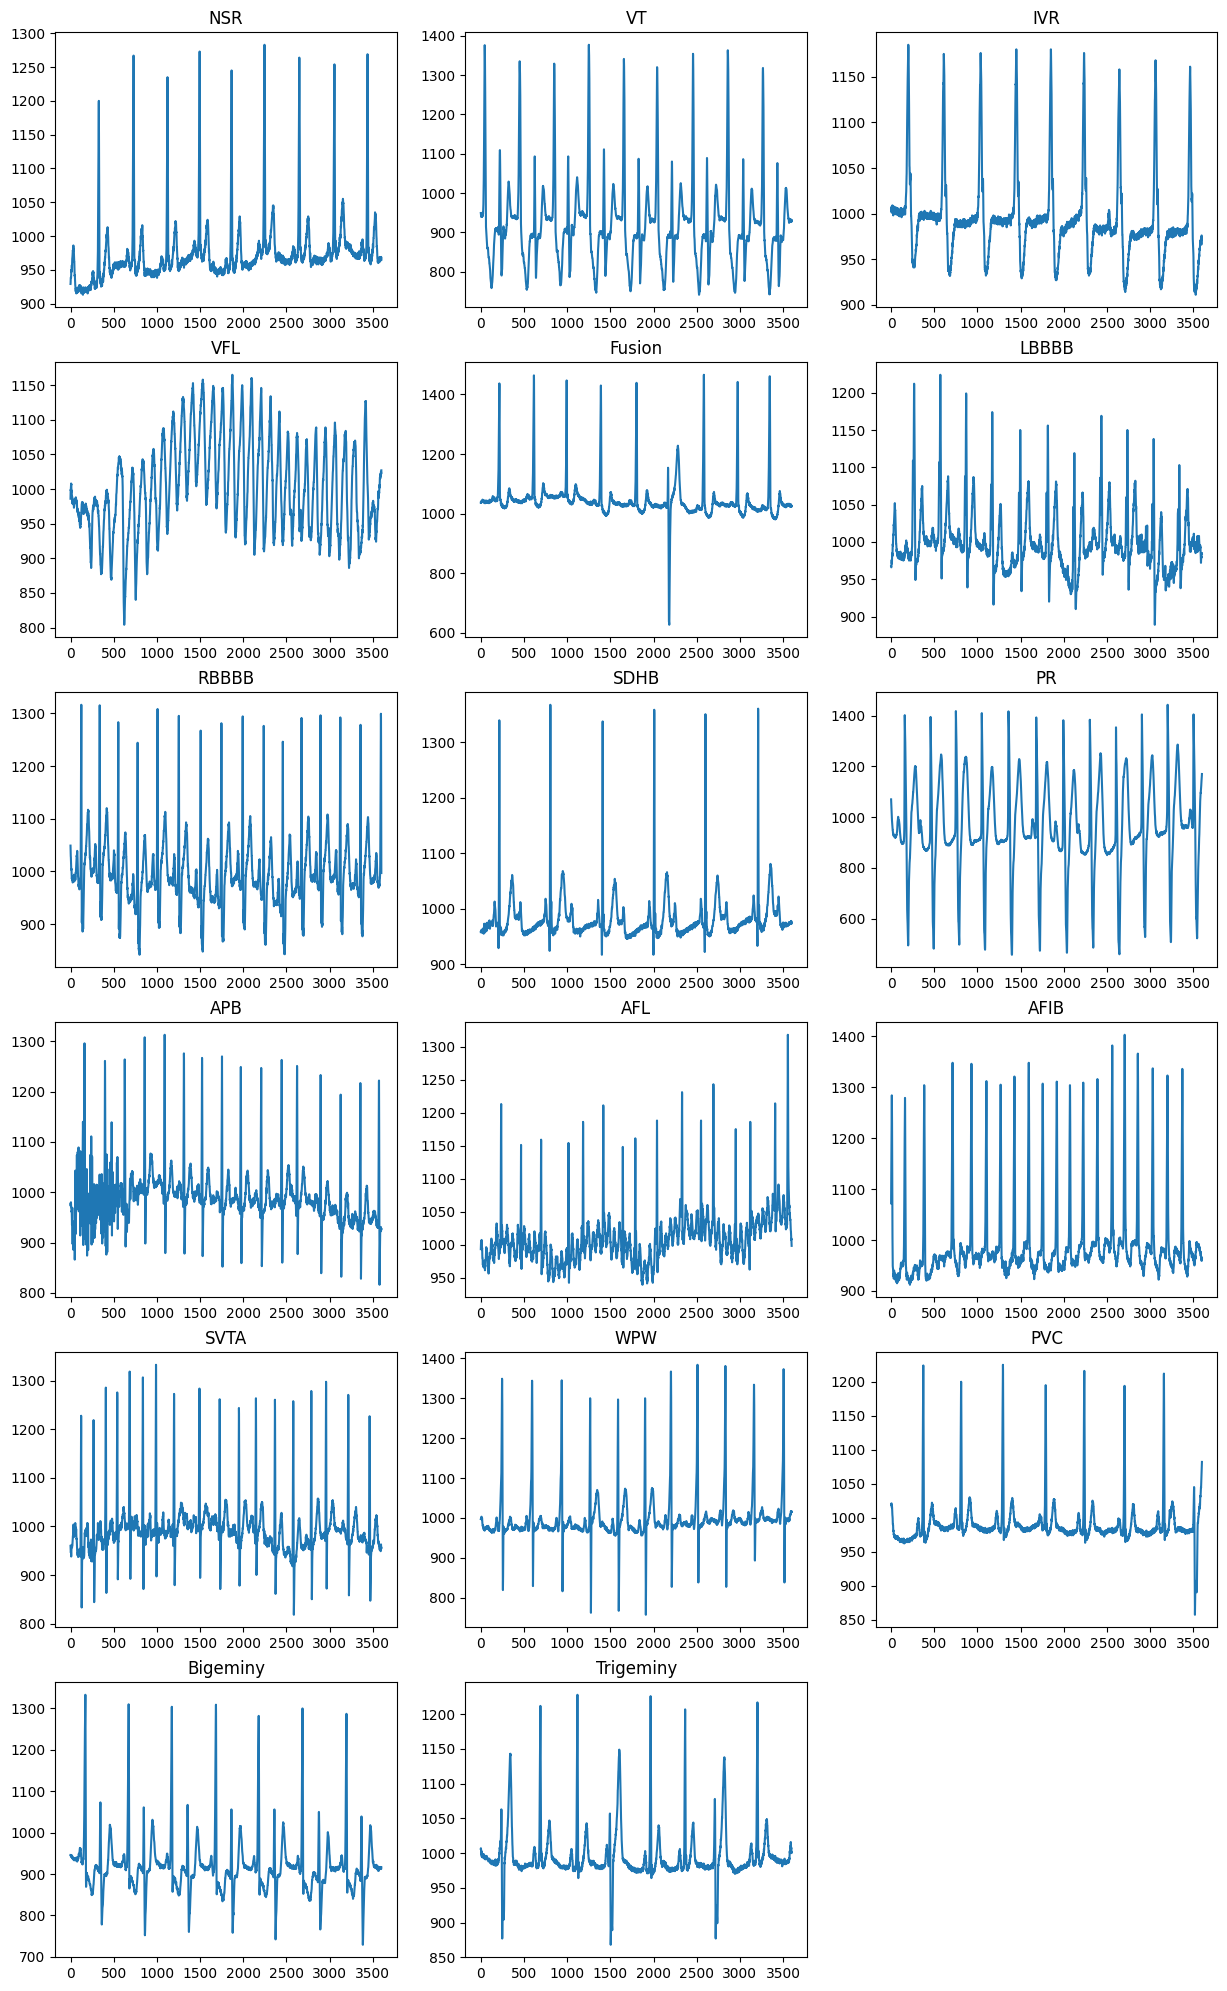

<Figure size 640x480 with 0 Axes>

In [11]:
pos = 0

plt.figure(figsize=(15,25))
#plt.suptitle()
print("Señales de DATABASE\n")
#plt.tight_layout(pad=10.0, h_pad=10.0, w_pad=20.0)  

for i, name in enumerate(dict_labels.keys()):
    plt.subplot(6,3,i+1)
    plt.plot(dict_labels[name][pos])
    plt.title(name)

plt.show()
plt.savefig('../resultados/imagenes/ecg_dominio_tiempo.png')

FFT de DATABASE



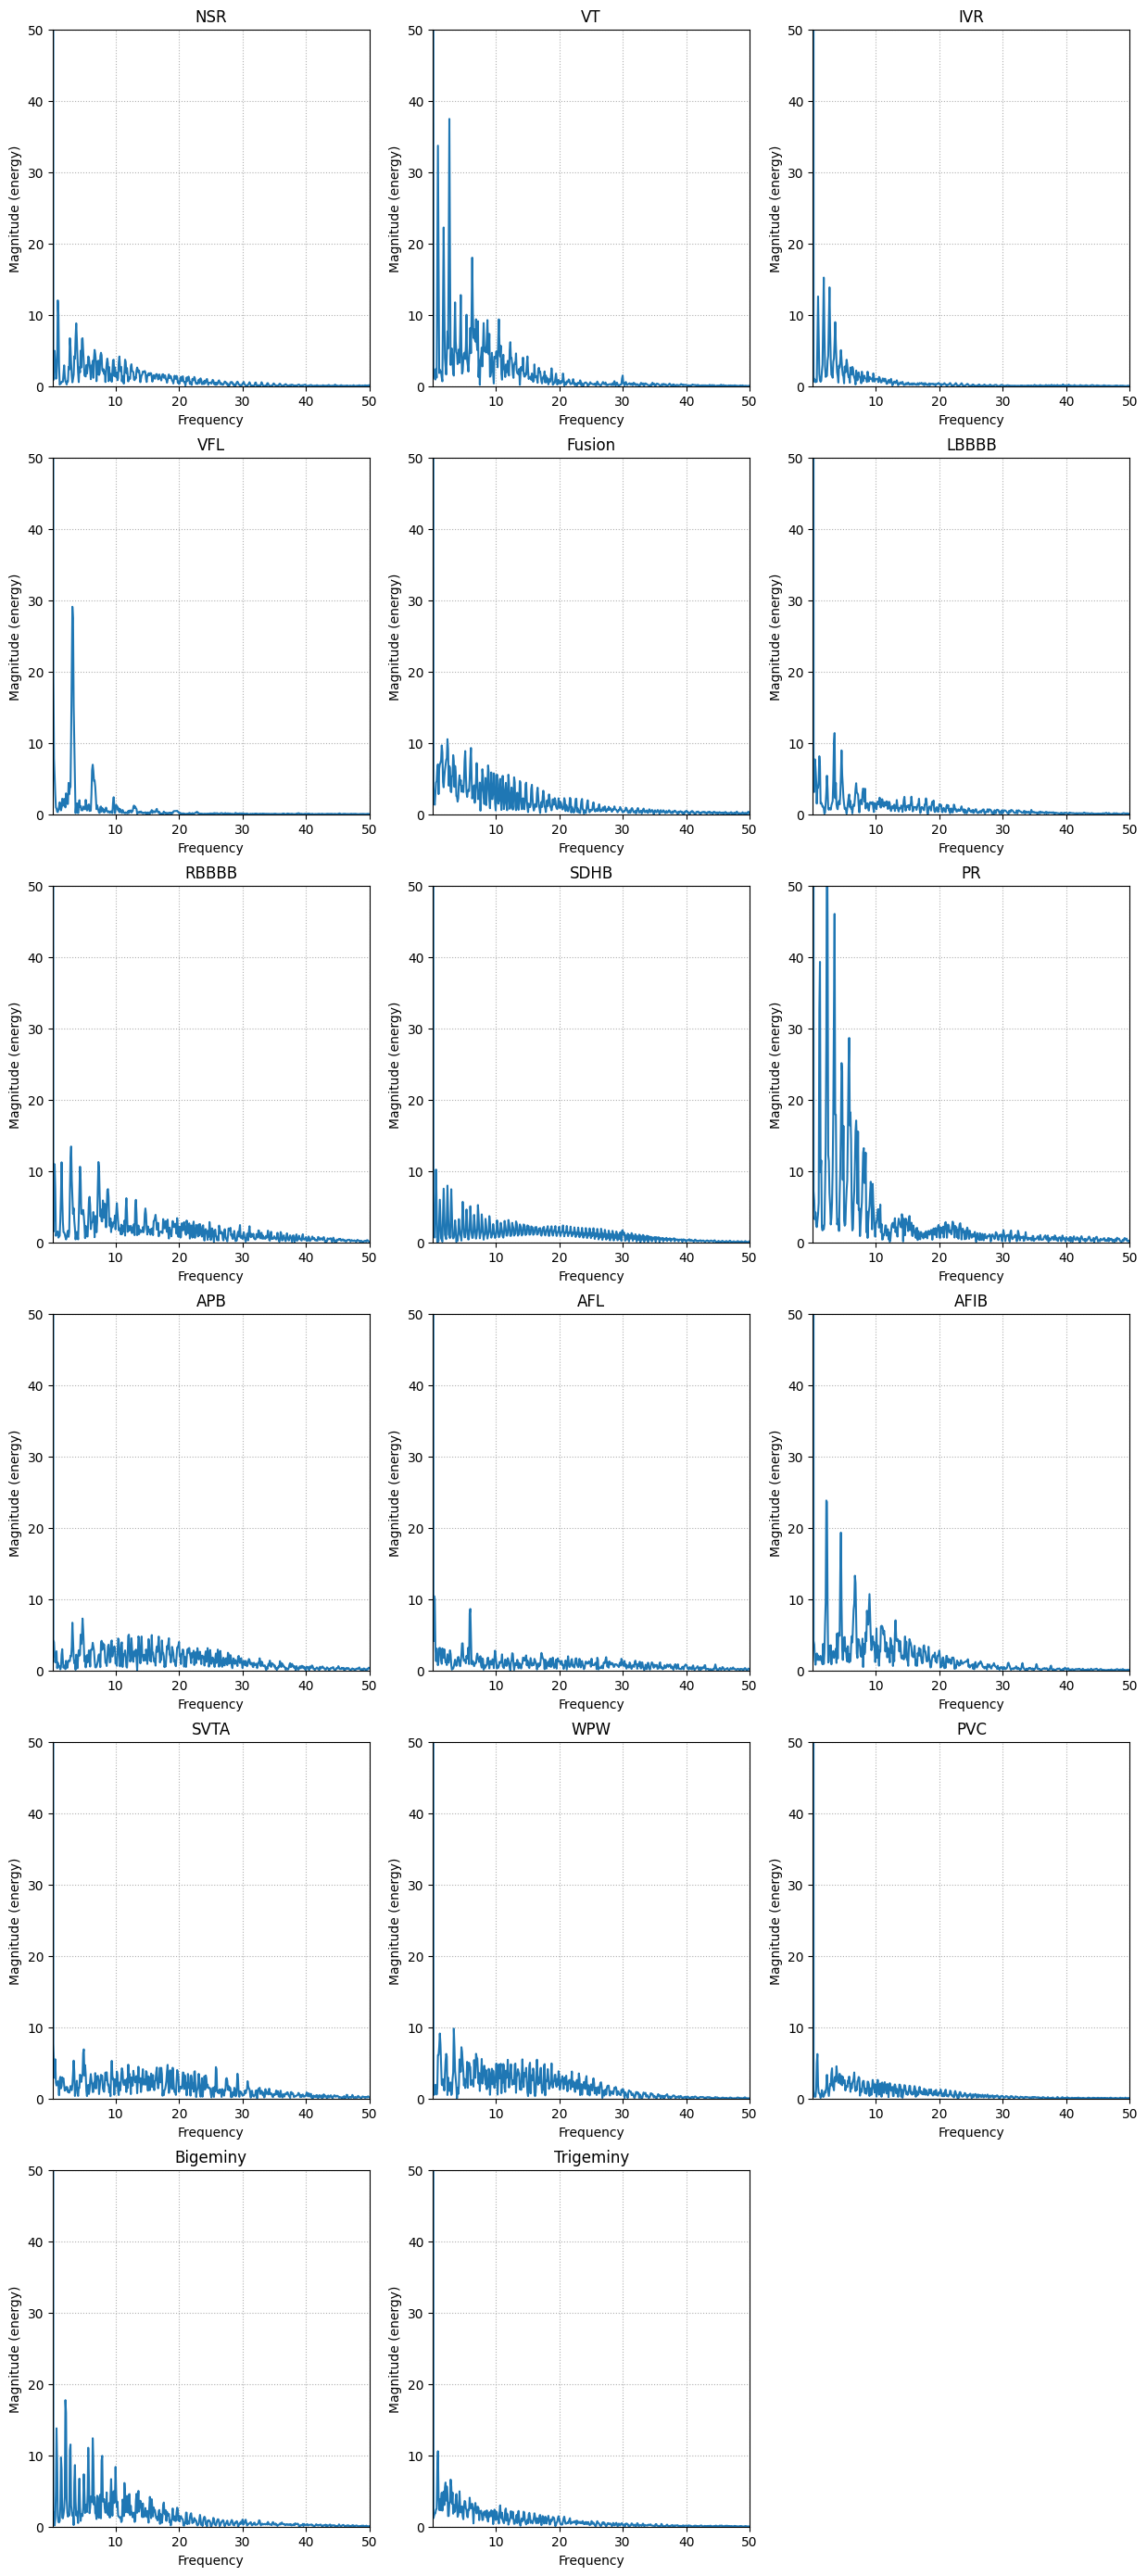

<Figure size 640x480 with 0 Axes>

In [12]:
pos = 0
fs = 360

plt.figure(figsize=(15,35))
print("FFT de DATABASE\n")
#plt.tight_layout()

for i, name in enumerate(dict_labels.keys()):
    plt.subplot(6,3,i+1)
    #plt.plot(dict_labels[name][pos])
    plt.magnitude_spectrum(dict_labels[name][pos], Fs=fs, color='C0')
    plt.xlim(0.1, 50)
    plt.ylim(0, 50)
    plt.grid(ls=":")
    #plt.axhline(0, color='black', lw=0.5)
    plt.title(name)

plt.show()
plt.savefig('../resultados/imagenes/ecg_dominio_frecuencia.png')

In [16]:
from scipy.signal import stft


STFT de DATABASE



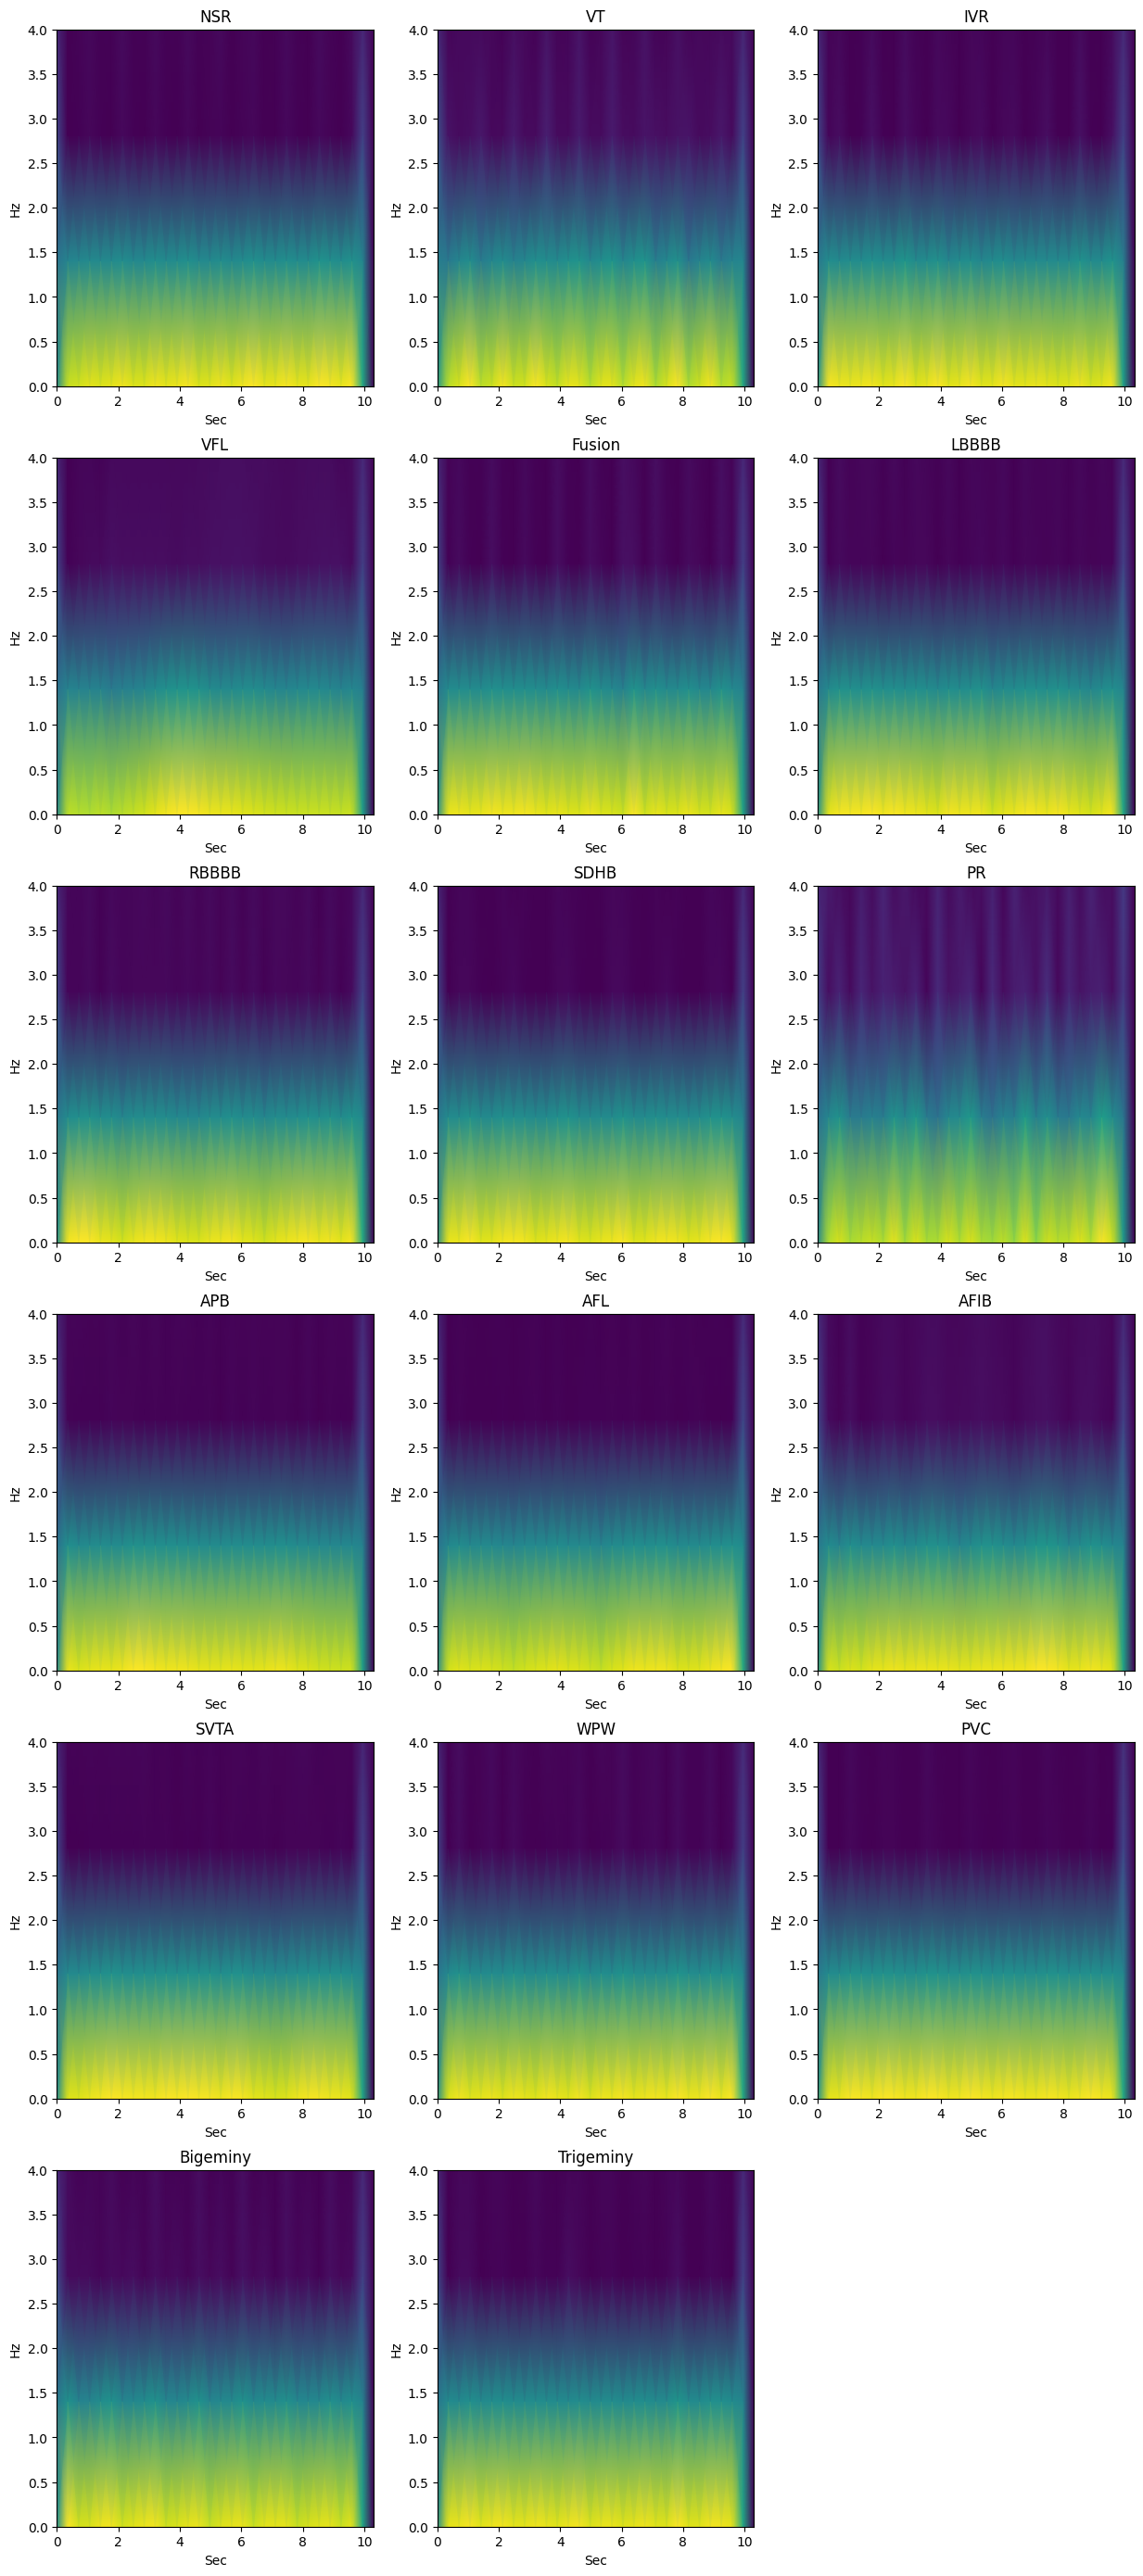

<Figure size 640x480 with 0 Axes>

In [27]:
pos = 0
fs = 360

plt.figure(figsize=(15,35))
print("STFT de DATABASE\n")
#plt.tight_layout()

for i, name in enumerate(dict_labels.keys()):
    plt.subplot(6,3,i+1)
    #plt.plot(dict_labels[name][pos])
    #plt.magnitude_spectrum(dict_labels[name][pos], Fs=fs, color='C0')
    #plt.xlim(0.1, 50)
    #plt.ylim(0, 50)
    #plt.grid(ls=":")
    #plt.axhline(0, color='black', lw=0.5)
    x = dict_labels[name][pos]
    f, t, Zxx = stft(x, fs=fs, nperseg=256)

    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.ylabel('Hz')
    plt.xlabel('Sec')
    plt.ylim(0, 4)
    plt.title(name)

plt.show()
plt.savefig('../resultados/imagenes/ecg_sftf.png')

Diagrama de barras de cantidad de señales por clase

In [14]:
dict_bar = {}
for i, name in enumerate(dict_labels.keys()):
    dict_bar[name] = len(dict_labels[name])
dict_bar

{'NSR': 283,
 'VT': 10,
 'IVR': 10,
 'VFL': 10,
 'Fusion': 11,
 'LBBBB': 103,
 'RBBBB': 62,
 'SDHB': 10,
 'PR': 45,
 'APB': 66,
 'AFL': 20,
 'AFIB': 135,
 'SVTA': 13,
 'WPW': 21,
 'PVC': 133,
 'Bigeminy': 55,
 'Trigeminy': 13}

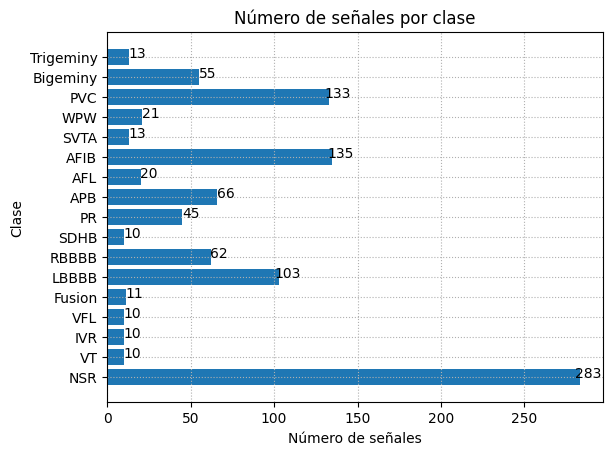

<Figure size 640x480 with 0 Axes>

In [15]:
plt.barh(dict_bar.keys(), dict_bar.values())
plt.yticks(rotation=0)
plt.grid(ls=":")
plt.title("Número de señales por clase")
plt.xlabel("Número de señales")
plt.ylabel("Clase")

for i, value in enumerate(dict_bar.values()):
    plt.text(value + 5, i, str(value), ha='center') # Added text labels on top of bars
plt.show()
plt.savefig('../resultados/imagenes/ecg_clases_barra.png')

In [ ]:
!mv dataset_ecg.zip ../ECG_DATASET/
!mv dict_labels.pkl ../ECG_DATASET/